<a href="https://colab.research.google.com/github/Darshan-Thakar/NLP_and_ML_projects/blob/main/CommentsEmotionClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing the required modules

import pandas as pd;
import numpy as np ;
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer;
from sklearn.feature_extraction.text import TfidfVectorizer;
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB;
from sklearn.svm import SVC;
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier;
from sklearn.model_selection import train_test_split;
from sklearn.metrics import confusion_matrix ;
from sklearn.metrics import classification_report
import spacy
from sklearn.ensemble import BaggingClassifier;
from sklearn.pipeline import Pipeline

**In this notebook we will try out different classification algorithms to classify comments into their respective emotions . In this commit I will try few algos and text representation techniques such as bag of words , bag of n_grams and TF-Idf. This text representation techniques do not capture the relationship between the words. In the next commit I will use different word embedding techniques as well as BERT for text representation**

In [ ]:
# Let's load the data 
df=pd.read_csv("https://raw.githubusercontent.com/codebasics/nlp-tutorials/main/12_tf_idf/Emotion_classify_Data.csv");

# I dont want to download the dataset from kaggle so i will load it using raw github csv uploaded on codebasics github page


df.head(5)

,Comment,Emotion
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear


In [ ]:
df.shape

(5937, 2)

In [ ]:
# The data set has 5937 rows and 2 columns

# let's check if there is any imbalance in the dataset

print(df.Emotion.value_counts());

anger    2000
joy      2000
fear     1937
Name: Emotion, dtype: int64


**The dataset is balanced so we don't need to apply the techniques to handle imbalanced. So, let's move on converting the labels of the dataset to numerical values**

In [ ]:
df['Emotion']=df['Emotion'].map({
    'anger':0,
    'joy':1,
    'fear':2
    
})

df.head(5)

,Comment,Emotion
0,i seriously hate one subject to death but now ...,2
1,im so full of life i feel appalled,0
2,i sit here to write i start to dig out my feel...,2
3,ive been really angry with r and i feel like a...,1
4,i feel suspicious if there is no one outside l...,2


**We have finally converted the labels into numerical values . Let's preprocess the text we will remove punctuations and derive the word into it's base form by applying Lemmatization**

In [ ]:
nlp=spacy.load("en_core_web_sm");
def preprocess(text):
  doc=nlp(text);
  filtered_tokens=[token.lemma_ for token in doc if not token.is_punct and not token.is_stop ];
  return " ".join(filtered_tokens);

**We will apply to our pandas Comment column and will create a new column called preprocesse_comments**

In [ ]:
df['preprocessed_comments']=df.Comment.apply(preprocess);

In [ ]:

X_train,X_test,Y_train,Y_test=train_test_split(df.preprocessed_comments,df.Emotion,test_size=0.2,random_state=2022);

**Building sklearn pipleline and using tfidf as a text representation**

In [ ]:
multinomial_nb=Pipeline([
    ('vectorizer',TfidfVectorizer()),
    ('model',MultinomialNB())
])

In [ ]:

multinomial_nb.fit(X_train,Y_train);
y_pred_multinomial_nb=multinomial_nb.predict(X_test);
report_multinomial=classification_report(Y_test,y_pred_multinomial_nb);
print(report_multinomial)

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       407
           1       0.93      0.91      0.92       400
           2       0.89      0.93      0.91       381

    accuracy                           0.91      1188
   macro avg       0.91      0.91      0.91      1188
weighted avg       0.91      0.91      0.91      1188



In [ ]:
corpus=[
    'I am frightened a lot what will happen tomorrow i have not completed the assignment . Miss.polly will eat me alive',
    'I have spent a lovely 4 weeks of holiday in switzerland . Definitely the best weeks of my life',
    'I am too much frustrated to have your stupid service',
    'I have hatred for him for his past behaviour with me i hope he dies soon.I get furious when i hear his name',
     'I got my delivery after five weeks the service offered was the most terrible service i have ever seen in my entire life',
     'I am delighted to have your superior service thank you ',
     
];


predictions=[];
for i in multinomial_nb.predict(corpus):
  if(i==0):
    predictions.append('Anger');
  elif i==1:
    predictions.append('Joy');
  else:
    predictions.append('Fear')    


print(predictions)

['Fear', 'Joy', 'Anger', 'Anger', 'Anger', 'Joy']


In [ ]:
random_forest=Pipeline([
    ('vectorizer',TfidfVectorizer()),
    ('model',RandomForestClassifier(n_estimators=25,criterion='gini'))
        
    
]);
random_forest.fit(X_train,Y_train);
y_pred_forest=random_forest.predict(X_test);
classificaton_report_forest=classification_report(Y_test,y_pred_forest);
print(classificaton_report_forest);


              precision    recall  f1-score   support

           0       0.93      0.90      0.92       407
           1       0.91      0.94      0.93       400
           2       0.93      0.92      0.92       381

    accuracy                           0.92      1188
   macro avg       0.92      0.92      0.92      1188
weighted avg       0.92      0.92      0.92      1188



In [ ]:
corpus=[
    'I am frightened a lot what will happen tomorrow i have not completed the assignment . Miss.polly will eat me alive',
    'I have spent a lovely 4 weeks of holiday in switzerland . Definitely the best weeks of my life',
    'I am too much frustrated to have your stupid service',
    'I have hatred for him for his past behaviour with me i hope he dies soon.I get furious when i hear his name',
     'I got my delivery after five weeks the service offered was the most terrible service i have ever seen in my entire life',
     'I am delighted to have your superior service thank you ',
     
];


predictions=[];
for i in random_forest.predict(corpus):
  if(i==0):
    predictions.append('Anger');
  elif i==1:
    predictions.append('Joy');
  else:
    predictions.append('Fear')    


print(predictions)

['Fear', 'Anger', 'Anger', 'Anger', 'Fear', 'Anger']


**As we can see in terms of both precision ,recall and f1-score random forest performs better than multinomial naive_bayes**

***Now let's try SVM(support vector machines) and see how it performs***

In [ ]:
svm=Pipeline([
    ('vectorizer',TfidfVectorizer()),
    ('model',SVC(kernel='linear',C=0.9))
]);

In [ ]:
svm.fit(X_train,Y_train);
y_pred_svm=svm.predict(X_test);
report_svm=classification_report(Y_test,y_pred_svm);
print(report_svm);

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       407
           1       0.93      0.95      0.94       400
           2       0.94      0.93      0.93       381

    accuracy                           0.94      1188
   macro avg       0.94      0.94      0.94      1188
weighted avg       0.94      0.94      0.94      1188



In [ ]:
corpus=[
    'I am frightened a lot what will happen tomorrow i have not completed the assignment . Miss.polly will eat me alive',
    'I have spent a lovely 4 weeks of holiday in switzerland . Definitely the best weeks of my life',
    'I am too much frustrated to have your stupid service',
    'I have hatred for him for his past behaviour with me i hope he dies soon.I get furious when i hear his name',
     'I got my delivery after five weeks the service offered was the most terrible service i have ever seen in my entire life',
     'I am delighted to have your superior service thank you ',
     "Pathetic experience! after two weeks of purchase, without installing major updates or software system crashed automatically in few minutes after a startup and showing Automatic repair could not repair your PC loop. Not able to return as it's is already been ended from Amazon side. I have purchased it as a no cost emi and for the next day delivery subscribed to prime as well. I don't know what to do, laptop still not working and i need to pay my next two EMIs."
     
];


predictions=[];
for i in svm.predict(corpus):
  if(i==0):
    predictions.append('Anger');
  elif i==1:
    predictions.append('Joy');
  else:
    predictions.append('Fear')    


print(predictions)

['Fear', 'Joy', 'Anger', 'Anger', 'Anger', 'Joy', 'Joy']


In [ ]:
decisionTree=Pipeline([
    ('vectorizer',TfidfVectorizer()),
    ('model',BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=25,random_state=2022))
])

In [ ]:
decisionTree.fit(X_train,Y_train);
y_pred=decisionTree.predict(X_test);
report_decisionTree=classification_report(Y_test,y_pred);
print(report_decisionTree)

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       407
           1       0.94      0.95      0.95       400
           2       0.94      0.94      0.94       381

    accuracy                           0.94      1188
   macro avg       0.94      0.94      0.94      1188
weighted avg       0.94      0.94      0.94      1188



In [ ]:
corpus=[
    'I am frightened a lot what will happen tomorrow i have not completed the assignment . Miss.polly will eat me alive',
    'I have spent a lovely 4 weeks holiday in switzerland . Definitely the best weeks of my life',
    'I am too much frustrated to have your stupid service',
    'I  have hatred for him for his past behaviour with me i hope he dies soon.I get furious when i hear his name',
    'I got my delivery after five weeks the service offered was the most terrible service i have ever seen in my entire life',
    'I am delighted to have your superior service thank you ',
   
];


predictions=[];
for i in decisionTree.predict(corpus):
  if(i==0):
    predictions.append('Anger');
  elif i==1:
    predictions.append('Joy');
  else:
    predictions.append('Fear')    


print(predictions)

['Fear', 'Anger', 'Anger', 'Anger', 'Anger', 'Anger']


**Till now our SVM models performs the best of all the models Note:- I have not tried out many different parameters . But you can use different hyperparameter tuning techniques such randomizedSearchCV, GridSearchCV to find the best parameters**

**Let's have a look at the confusion matrix of our svm model**




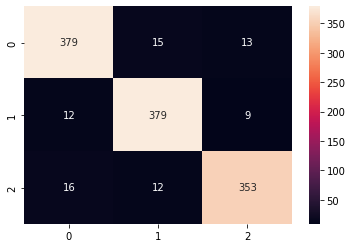

In [ ]:
cm=confusion_matrix(Y_test,y_pred_svm);

sns.heatmap(cm, annot=True,fmt='d')

**Now we will train the models after getting the text representation by using word embeddings.As Tf-Idf and bag of words are unable to capture the meanings of the word and cannot handle oov(Out of vocabulary) problem.We will now use spacy to get word embeddings**

In [ ]:
import spacy.cli
spacy.cli.download("en_core_web_lg");



✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [ ]:
nlp=spacy.load("en_core_web_lg");

In [ ]:

def preprocess_and_vectorize(text):
  document=nlp(text);
  filtered_tokens=[token.lemma_ for token in document if not token.is_stop and not token.is_punct];
  preprocessed_text=" ".join(filtered_tokens);
  return nlp(preprocessed_text).vector;

df['word_embeddings']=df['Comment'].apply(preprocess_and_vectorize);

In [ ]:
df['word_embeddings'][0].shape

(300,)

**Our each embedding of the sentence is of dimension 300.We get embeddings of the sentence by finding the mean vector of all the embeddings of the tokens in a  sentence.**

In [ ]:
df.head(3)

,Comment,Emotion,preprocessed_comments,word_embeddings
0,i seriously hate one subject to death but now ...,2,seriously hate subject death feel reluctant drop,"[0.23427427, -0.18293425, -2.0742915, -1.76109..."
1,im so full of life i feel appalled,0,m life feel appal,"[-0.18391502, -2.1977448, -2.836125, -3.996749..."
2,i sit here to write i start to dig out my feel...,2,sit write start dig feeling think afraid accep...,"[0.990039, 2.0657575, -1.9255166, -0.9510855, ..."


**Let's do the train test splitting**

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(df['word_embeddings'],df.Emotion,test_size=0.2,random_state=2022);

X_train=np.stack(X_train);
X_test=np.stack(X_test);

 **We will use now train the multinomial naive bayes model using the sentence embeddings generated. But multinomial naive bayes cannot handle negatives so we will scale the embeddings.Let's use sklearn pipeline to achieve the same**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

multinomial_nb=Pipeline([
    
    ('Scaler',MinMaxScaler()),
    ('model',MultinomialNB())

])

multinomial_nb.fit(X_train,Y_train)


Pipeline(steps=[('Scaler', MinMaxScaler()), ('model', MultinomialNB())])

In [ ]:
y_pred_multinomial_nb=multinomial_nb.predict(X_test);
cr_nb=classification_report(Y_test,y_pred_multinomial_nb);

***Classification report of multinomial naive bayes***

In [ ]:
print(cr_nb)

              precision    recall  f1-score   support

           0       0.54      0.58      0.56       407
           1       0.55      0.70      0.62       400
           2       0.50      0.31      0.38       381

    accuracy                           0.54      1188
   macro avg       0.53      0.53      0.52      1188
weighted avg       0.53      0.54      0.52      1188



In [ ]:
random_forest=Pipeline(
    [
        ('model',RandomForestClassifier(n_estimators=25,criterion='gini'))
    ]
)

In [ ]:
random_forest.fit(X_train,Y_train);

In [ ]:
y_pred_rf=random_forest.predict(X_test);
cr_rf=classification_report(Y_test,y_pred_rf);
print(cr_rf);

              precision    recall  f1-score   support

           0       0.53      0.60      0.56       407
           1       0.63      0.66      0.64       400
           2       0.52      0.43      0.47       381

    accuracy                           0.56      1188
   macro avg       0.56      0.56      0.56      1188
weighted avg       0.56      0.56      0.56      1188



In [ ]:
knn=KNeighborsClassifier(n_neighbors=5);
knn.fit(X_train,Y_train);
y_pred=knn.predict(X_test);
cr_knn=classification_report(Y_test,y_pred);
print(cr_knn)

              precision    recall  f1-score   support

           0       0.45      0.65      0.53       407
           1       0.60      0.45      0.51       400
           2       0.44      0.34      0.38       381

    accuracy                           0.48      1188
   macro avg       0.49      0.48      0.48      1188
weighted avg       0.50      0.48      0.48      1188



**We will save the svm which gave us best results.**

In [ ]:
import pickle

with open("emotions_model","wb") as fb:
  pickle.dump(svm,fb);


**We will now use fasttext to train a supervised learning model to classify the emotions . We will also get embeddings using fasttext. Fasttext is better at handling the oov(Out of vocabulary) problem than word2vec.It is an extension to the word2vec model which uses character n_grams instead of words.**

In [ ]:
df.head(4)

,Comment,Emotion,preprocessed_comments,word_embeddings
0,i seriously hate one subject to death but now ...,2,seriously hate subject death feel reluctant drop,"[0.23427427, -0.18293425, -2.0742915, -1.76109..."
1,im so full of life i feel appalled,0,m life feel appal,"[-0.18391502, -2.1977448, -2.836125, -3.996749..."
2,i sit here to write i start to dig out my feel...,2,sit write start dig feeling think afraid accep...,"[0.990039, 2.0657575, -1.9255166, -0.9510855, ..."
3,ive been really angry with r and i feel like a...,1,ve angry r feel like idiot trust place,"[-0.23489627, 1.0831214, -1.9585762, -1.482742..."


In [ ]:
# To train the fasttext model we will load the dataset again as it required the original text values of labels and we will preprocess it using regex and spacy

In [ ]:
fasttext_df=pd.read_csv("https://raw.githubusercontent.com/codebasics/nlp-tutorials/main/12_tf_idf/Emotion_classify_Data.csv");


In [ ]:
fasttext_df.head(4)

,Comment,Emotion
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy


In [ ]:
fasttext_df.Emotion.value_counts()

anger    2000
joy      2000
fear     1937
Name: Emotion, dtype: int64

In [ ]:
nlp=spacy.load("en_core_web_sm");
import re
def preprocess(text):
  #Removing the punctuations
  text=re.sub('[^\w\s]',' ',text);
  # Removing white spaces
  text=re.sub(' +',' ',text);
  # Removing stop words and deriving the lemma_ of each word
  doc=nlp(text);
  filtered_token=[token.lemma_ for token in doc if not token.is_stop];
  return " ".join(filtered_token);
  

In [ ]:
fasttext_df['preprocessed']=fasttext_df['Comment'].apply(preprocess);

In [ ]:
fasttext_df['Emotion']="__label__" + fasttext_df.Emotion.astype(str);

In [ ]:
fasttext_df.Emotion.unique()

array(['__label__fear', '__label__anger', '__label__joy'], dtype=object)

In [ ]:
# Creating one more column to present the data format which is accepted by fasttext

In [ ]:
fasttext_df['data_fasttext']=fasttext_df['Emotion'] + ' ' + fasttext_df['preprocessed'];

In [ ]:
fasttext_df.data_fasttext.head(4)

0    __label__fear seriously hate subject death fee...
1                     __label__anger m life feel appal
2    __label__fear sit write start dig feeling thin...
3    __label__joy ve angry r feel like idiot trust ...
Name: data_fasttext, dtype: object

In [ ]:
# Train test splitting the data
X_train,X_test=train_test_split(fasttext_df.data_fasttext,test_size=0.2);


In [ ]:
X_train.shape

(4749,)

In [ ]:
X_test.shape

(1188,)

In [ ]:
X_train.to_csv("fasttext_training.csv",header=False,index=False);

In [ ]:
X_test.to_csv("fasttext_testing.csv",header=False,index=False);

In [ ]:
# Installing fasttext library

! pip install fasttext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Training the fasttext model

import fasttext

model=fasttext.train_supervised(input="fasttext_training.csv");

In [ ]:
model.test("fasttext_testing.csv")

(1188, 0.9191919191919192, 0.9191919191919192)

In [ ]:
# We got almost 92% percent precision and recall for the testing data set using fasttext 

In [ ]:
corpus=[
    'I am frightened a lot what will happen tomorrow i have not completed the assignment . Miss.polly will eat me alive',
    'I have spent a lovely 4 weeks holiday in switzerland . Definitely the best weeks of my life',
    'I am too much frustrated to have your stupid service',
    'I  have hatred for him for his past behaviour with me i hope he dies soon.I get furious when i hear his name',
    'I got my delivery after five weeks the service offered was the most terrible service i have ever seen in my entire life',
    'I am delighted to have your superior service thank you ',
   
];


predicted=model.predict(corpus);

In [ ]:
predicted

([['__label__fear'],
  ['__label__joy'],
  ['__label__anger'],
  ['__label__anger'],
  ['__label__joy'],
  ['__label__joy']],
 [array([0.8134978], dtype=float32),
  array([0.5308329], dtype=float32),
  array([0.966038], dtype=float32),
  array([0.5766325], dtype=float32),
  array([0.40225565], dtype=float32),
  array([0.6009911], dtype=float32)])

In [ ]:
print(model.predict("Pathetic experience! after two weeks of purchase, without installing major updates or software system crashed automatically in few minutes after a startup and showing Automatic repair could not repair your PC loop. Not able to return as it's is already been ended from Amazon side. I have purchased it as a no cost emi and for the next day delivery subscribed to prime as well. I don't know what to do, laptop still not working and i need to pay my next two EMIs."));

(('__label__anger',), array([0.38655722]))


In [ ]:
# Both SVM and fasttext have amazing performance .